## Observations and Insights

1.  Capomulin is not a high variance drug, sharing the low variance spot with Ramicane.  Ketapril and Naftisol are the highest variance drugs.
2.  The 4 testing regimens (Capmoulin, Ramicane, Infubinol, Ceftamin) have no major outliers.
3.  There is a strong positive correlation between Mouse Weight and Average Tumor volume (0.84).  Makes sense since greater weights lead to the potential for larger masses.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen = df.groupby('Drug Regimen')

mean = regimen["Tumor Volume (mm3)"].mean()
median = regimen["Tumor Volume (mm3)"].median()
sd = regimen["Tumor Volume (mm3)"].std()
sem = regimen["Tumor Volume (mm3)"].sem()

Summary_1= pd.DataFrame({"Mean": mean,"Median" : median,"Sd" : sd,"SEM" : sem})
Summary_1

,Mean,Median,Sd,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.322552,50.854632,6.507770,0.512884
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar plots

[Text(0, 0, 'Capomulin'),
 Text(0, 0, 'Ceftamin'),
 Text(0, 0, 'Infubinol'),
 Text(0, 0, 'Ketapril'),
 Text(0, 0, 'Naftisol'),
 Text(0, 0, 'Placebo'),
 Text(0, 0, 'Propriva'),
 Text(0, 0, 'Ramicane'),
 Text(0, 0, 'Stelasyn'),
 Text(0, 0, 'Zoniferol')]

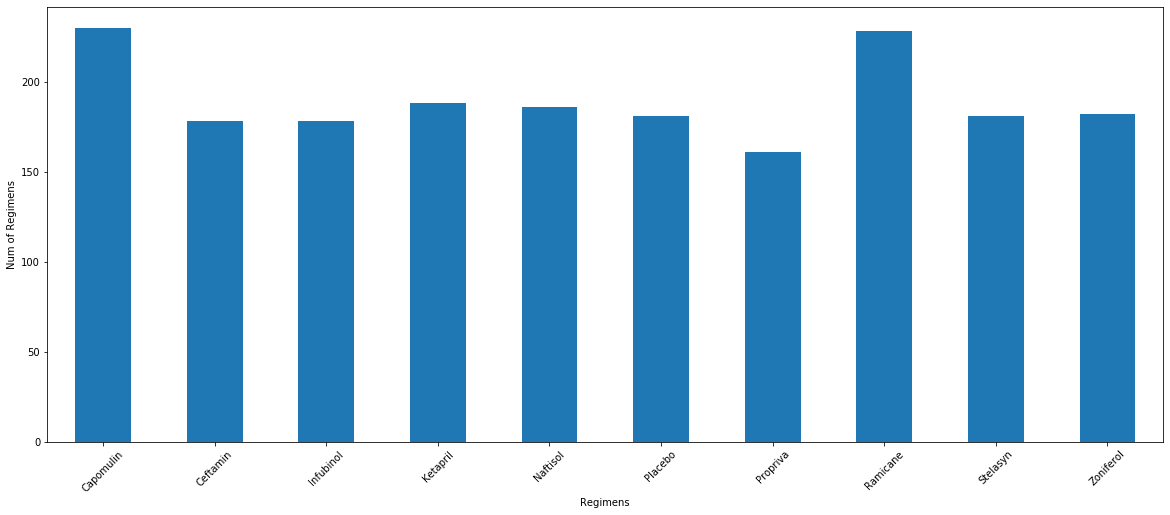

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_num =regimen['Drug Regimen'].count()

# Create a bar chart based off of the group series from before
regimen_chart = regimen_num.plot(kind='bar',figsize = (20,8))

# Set the xlabel and ylabel using class methods
regimen_chart.set_xlabel("Regimens")
regimen_chart.set_ylabel("Num of Regimens")
regimen_chart.set_xticklabels(regimen['Drug Regimen'].unique(),rotation = 45)

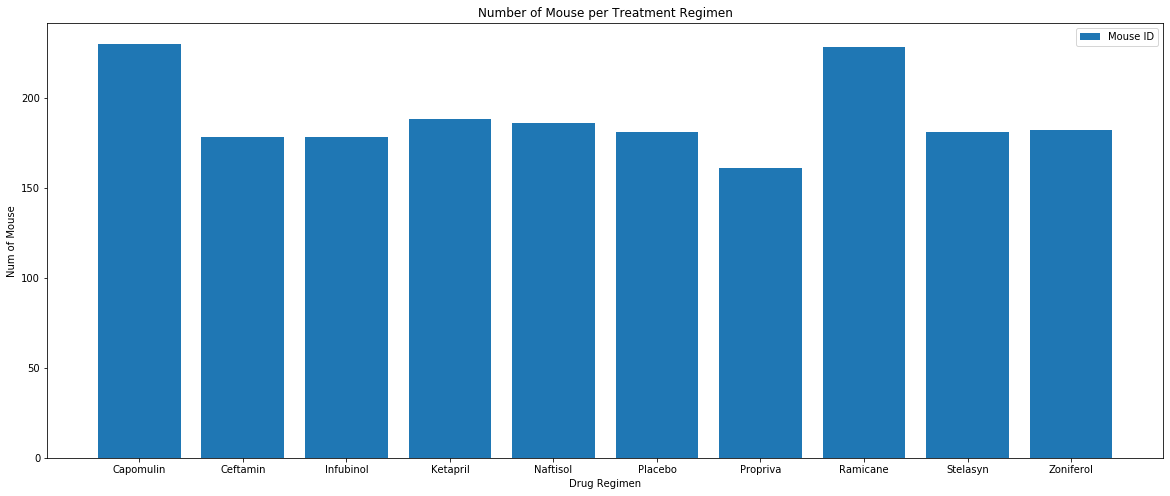

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

drugnum = df.groupby(["Drug Regimen"]).count().reset_index()
plt.figure(figsize=(20,8))
plt.bar(drugnum["Drug Regimen"],drugnum["Mouse ID"],label = "Mouse ID")
plt.xlabel("Drug Regimen")
plt.ylabel("Num of Mouse")
plt.title("Number of Mouse per Treatment Regimen")
plt.legend(loc="upper right")


## Pie plots

Text(0, 0.5, '')

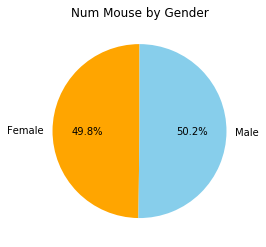

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gen_group = mouse_metadata.groupby('Sex')

gender = gen_group['Sex'].count()
colors = ["orange","skyblue"]
gen_pie = gender.plot(kind='pie', startangle = 90, colors = colors, autopct = "%1.1f%%",title = "Num Mouse by Gender")
gen_pie.set_ylabel("")

Text(0.5, 1.0, 'Num Mouse by Gender')

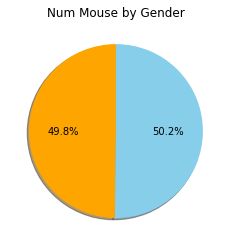

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = gen_group['Sex'].count()
labels = ['Female','Male']
plt.pie(gender, colors=colors,autopct="%1.1f%%",shadow=True, startangle=90)
plt.title("Num Mouse by Gender")

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Capomulin, Ramicane, Infubinol, and Ceftamin.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

treat_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

final_df = df[(df.Timepoint == 45)]
final_df = final_df.rename(columns = {'Drug Regimen':"Regimen"})
final_df = final_df.loc[final_df['Regimen'].isin(treat_list)]
final_df = final_df.drop(columns = ['Weight (g)','Age_months','Metastatic Sites','Sex','Timepoint'])

#Capomulin
treat_lowerb = []
treat_upperb = []
treat_iqr_lst = []

for treat in treat_list:
    treat_df = final_df.loc[final_df['Regimen'] == treat]
    treat_quart = treat_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    treat_lower = treat_quart[0.25]
    treat_upper = treat_quart[0.75]
    treat_iqr = treat_upper - treat_lower
    lowerb = treat_lower - (1.5*treat_iqr)
    upperb = treat_upper + (1.5*treat_iqr)
    treat_lowerb.append(lowerb)
    treat_upperb.append(upperb)
    treat_iqr_lst.append(treat_iqr)

treat_df = pd.DataFrame({'Name':treat_list,
                         'Lower_Bound':treat_lowerb,
                        'Upper_Bound':treat_upperb,
                        'IQR':treat_iqr_lst})

treat_df

,Name,Lower_Bound,Upper_Bound,IQR
0,Capomulin,20.704562,51.832015,7.781863
1,Ramicane,19.690480,49.799000,7.527130
2,Infubinol,55.357776,75.082244,4.931117
3,Ceftamin,52.293507,76.667868,6.093590


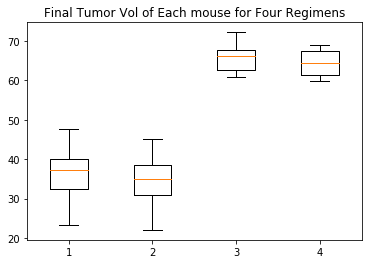

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fdata = []
for drug in treat_list:
    drug_df = final_df.loc[final_df['Regimen'] == drug]
    drug_lst = drug_df['Tumor Volume (mm3)']
    fdata.append(drug_lst)

fig, ax = plt.subplots()
ax.set_title('Final Tumor Vol of Each mouse for Four Regimens')
ax.boxplot(fdata)

plt.show()



## Line and scatter plots

Text(0.5, 0, 'timepoints')

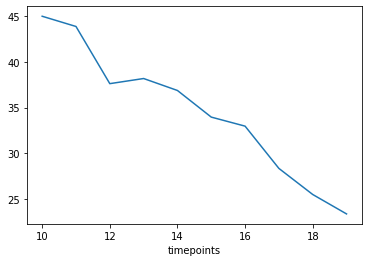

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
ctime_df = df.loc[df['Drug Regimen'] == 'Capomulin']
#PICK a random mouse ID: s185
ctime_df = ctime_df.loc[ctime_df['Mouse ID'] == 's185']
ctime_df = ctime_df.drop(columns = ['Weight (g)','Age_months','Metastatic Sites','Sex','Mouse ID','Drug Regimen'])

vol = ctime_df["Tumor Volume (mm3)"]
vol_plot = vol.plot()
vol_plot.set_xlabel("timepoints")

Text(0.5, 1.0, 'Avg Tumor Volume by Weight')

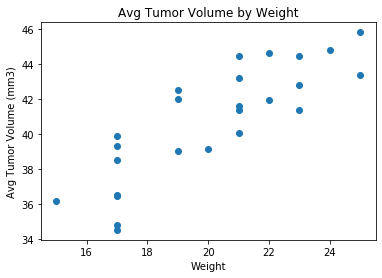

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_df = df.loc[df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()
scatter_df = scatter_df[["Weight (g)", "Tumor Volume (mm3)"]]
plt.scatter(scatter_df["Weight (g)"],scatter_df["Tumor Volume (mm3)"])
plt.xlabel("Weight")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Avg Tumor Volume by Weight")

Correlation between Weight and Average Tumor Volume for Capomulin is 0.84


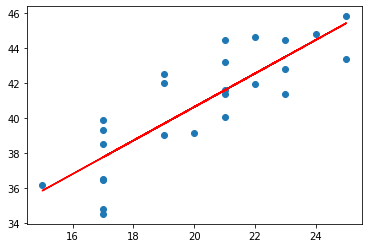

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

corr_weight = st.pearsonr(scatter_df["Weight (g)"],scatter_df["Tumor Volume (mm3)"])
print(f"Correlation between Weight and Average Tumor Volume for Capomulin is {round(corr_weight[0],2)}")

#Linear Regression Model
lin_x = scatter_df["Weight (g)"]
lin_y = scatter_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lin_x, lin_y)
reg_val = lin_x * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lin_x, lin_y)
plt.plot(lin_x, reg_val,"r-")
#plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.show()